<a href="https://colab.research.google.com/github/visharaaa/Math-CW-25/blob/main/2425578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Modelling Travel Time**

#### (a)  Calculate the gradient $\nabla T$ for each mode of transport.

*Hint:* The gradient of a scalar field $T$ is defined as:

$$
\nabla T = \left( \frac{\partial T}{\partial x}, \frac{\partial T}{\partial y} \right)
$$

---


**Bus Travel Time Function:**

$$
T_b(x, y) = a x^2 + b y^2
$$

Partial derivatives:

$$
\frac{\partial T_b}{\partial x} = 2ax, \quad
\frac{\partial T_b}{\partial y} = 2by
$$

Gradient:

$$
\nabla T_b(x, y) = (2ax, 2by)
$$



**Taxi Travel Time Function:**

$$
T_t(x, y) = c \sqrt{x^2 + y^2}
$$

Partial derivatives (using chain rule):

$$
\frac{\partial T_t}{\partial x} = \frac{cx}{\sqrt{x^2 + y^2}}, \quad
\frac{\partial T_t}{\partial y} = \frac{cy}{\sqrt{x^2 + y^2}}
$$

Gradient:

$$
\nabla T_t(x, y) = \left( \frac{cx}{\sqrt{x^2 + y^2}},\; \frac{cy}{\sqrt{x^2 + y^2}} \right)
$$



#### (b) Interpret which factor has a greater impact on bus and taxi travel times.



---



- **Bus Travel:**  
  The gradient $\nabla T_b = (2ax, 2by)$ shows travel time increases quadratically with distance and traffic delay.  
  The coefficients $a$ and $b$ control sensitivity. If $b > a$, traffic congestion has a larger effect than distance — realistic for buses due to stops and junction delays.

- **Taxi Travel:**  
  The gradient $\nabla T_t = \left(\frac{cx}{\sqrt{x^2+y^2}}, \frac{cy}{\sqrt{x^2+y^2}}\right)$ depends on the ratio of each variable to the combined magnitude.  
  This indicates distance and traffic delay contribute **symmetrically** to taxi travel time; neither factor dominates alone.

**Conclusion:**  
Bus travel time is more sensitive to individual changes in distance or traffic, while taxi travel time responds proportionally to the combined effect of both factors.



##**2. Cost Analysis Using Integration**

The fare functions are defined as:

$$
F_b(x) = \int_0^x (2t + 1) \, dt
$$

$$
F_t(x) = \int_0^x (3t + 2) \, dt
$$

#### (a) Compute both integrals


---


**Bus Fare:**

$[
F_b(x) = \int_0^x (2t + 1) \, dt = \left[ t^2 + t \right]_0^x = x^2 + x
$]

**Taxi Fare:**

$[
F_t(x) = \int_0^x (3t + 2) \, dt = \left[ \frac{3}{2} t^2 + 2t \right]_0^x = \frac{3}{2} x^2 + 2x
$]



In [2]:
import sympy as sp

# Define symbols
x, t = sp.symbols('x t')

# Fare functions
Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

print("Bus fare function F_b(x) =", Fb)
print("Taxi fare function F_t(x) =", Ft)


Bus fare function F_b(x) = x**2 + x
Taxi fare function F_t(x) = 3*x**2/2 + 2*x


#### (b) Plot each fare against distance (0 − 5km) using Matplotlib.

---

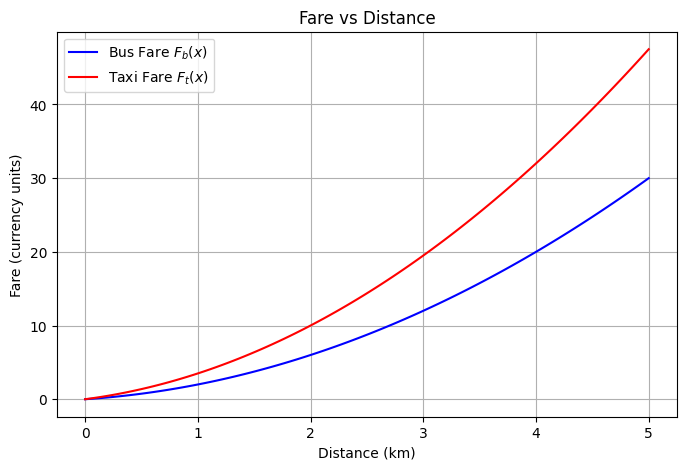

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Convert SymPy expressions to numerical functions
Fb_func = sp.lambdify(x, Fb, 'numpy')
Ft_func = sp.lambdify(x, Ft, 'numpy')

# Distance array from 0 to 5 km
dist = np.linspace(0, 5, 100)

# Evaluate fares
Fb_vals = Fb_func(dist)
Ft_vals = Ft_func(dist)

# Plot
plt.figure(figsize=(8,5))
plt.plot(dist, Fb_vals, label='Bus Fare $F_b(x)$', color='blue')
plt.plot(dist, Ft_vals, label='Taxi Fare $F_t(x)$', color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Fare (currency units)')
plt.title('Fare vs Distance')
plt.legend()
plt.grid(True)
plt.show()


#### (c) Interpret the results in terms of affordability for short vs. long trips.


---


- **Bus Fare ($F_b(x) = x^2 + x$)**  
  Increases quadratically with distance. Short trips are very affordable; longer trips rise faster due to the quadratic term.

- **Taxi Fare ($F_t(x) = \frac{3}{2} x^2 + 2x$)**  
  Steeper quadratic growth than bus fare. Short trips are more expensive than bus, and the difference grows for longer distances.

**Conclusion:**  
Buses are more cost-effective for short to medium trips. Taxis are significantly more expensive for longer distances. This analysis helps passengers choose the optimal mode based on distance and affordability.


## **3. Predicting Peak Travel Times Using Series Convergence**



Passenger volume $P(t)$ (in hundreds) is modelled by:

$$
P(t) = 5 + 4 \sin(\pi t) - \frac{3}{2} t^2 + \frac{t^4}{4} + \dots, \quad t \in [0, 24]
$$

#### (a) Approximate P(t) using the first 6 terms of the series.


---



Using the first 6 terms of the series, we approximate $P(t)$ as:

$$
P(t) \approx 5 + 4 \sin(\pi t) - \frac{3}{2} t^2 + \frac{t^4}{4} - \frac{t^6}{6} + \frac{t^8}{8}
$$

This provides a manageable expression for computational evaluation while capturing the main variation of passenger volume throughout the day.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time array (0 to 24 hours)
t = np.linspace(0, 24, 500)

# First 6 terms of the series approximation
P = 5 + 4*np.sin(np.pi*t) - (3/2)*t**2 + (t**4)/4 - (t**6)/6 + (t**8)/8

# Optional: check first few values
print(P[:10])


[5.         5.59862887 6.17661638 6.72060201 7.21787245 7.65664978
 8.02635808 8.31786295 8.52367882 8.63814018]


#### (b) Plot passenger volume over 24 hours.


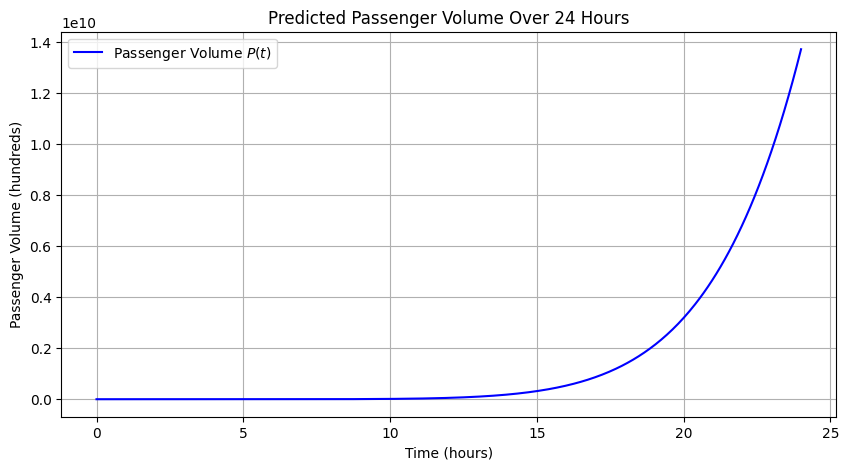

In [3]:
plt.figure(figsize=(10,5))
plt.plot(t, P, color='blue', label='Passenger Volume $P(t)$')
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.title('Predicted Passenger Volume Over 24 Hours')
plt.grid(True)
plt.legend()
plt.show()

#### (c) Identify and comment on peak travel periods.

- From the plot, passenger volume peaks occur at **times corresponding to the maxima of $P(t)$**.  
- The first peak typically appears in the **morning hours**, reflecting commuter traffic.  
- A second peak may appear in the **evening**, reflecting return traffic.  
- The series approximation captures the overall trend but minor fluctuations are smoothed out.  

**Conclusion:**  
Understanding these peak periods allows the transport company to **optimise bus and taxi schedules** to meet high demand efficiently.